<a href="https://colab.research.google.com/github/lalitha-sahitya/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import os

In [73]:
!pip install opendatasets

In [74]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques')

Skipping, found downloaded files in "./house-prices-advanced-regression-techniques" (use force=True to force download)


In [75]:
os.listdir('house-prices-advanced-regression-techniques')

['test.csv', 'data_description.txt', 'train.csv', 'sample_submission.csv']

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
data=pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [173]:
test_data=pd.read_csv('/content/house-prices-advanced-regression-techniques/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [175]:
data.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [176]:
test_data.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


In [177]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [178]:
data.select_dtypes(include='number').corrwith(data['SalePrice'])

,0
Id,-0.021917
MSSubClass,-0.084284
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.386420


<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

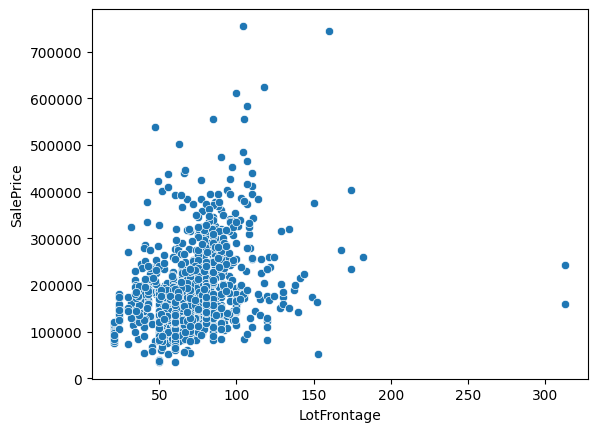

In [179]:
sns.scatterplot(x='LotFrontage',y='SalePrice',data=data)

<Axes: xlabel='YearBuilt', ylabel='Count'>

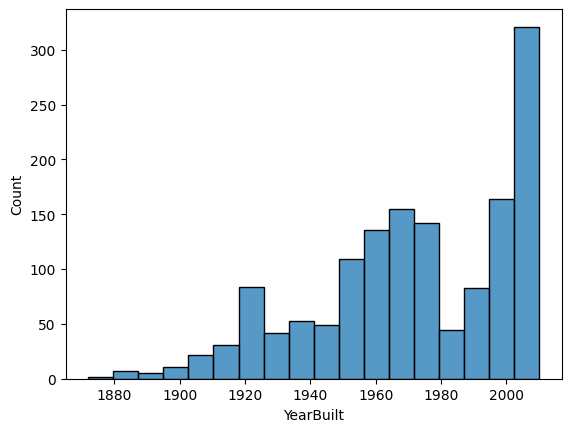

In [180]:
sns.histplot(data['YearBuilt'])

<Axes: xlabel='YearRemodAdd', ylabel='Count'>

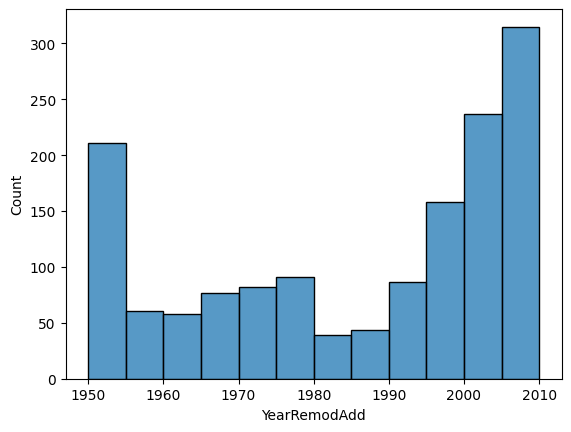

In [181]:
sns.histplot(data['YearRemodAdd'])

<Axes: xlabel='YrSold', ylabel='Count'>

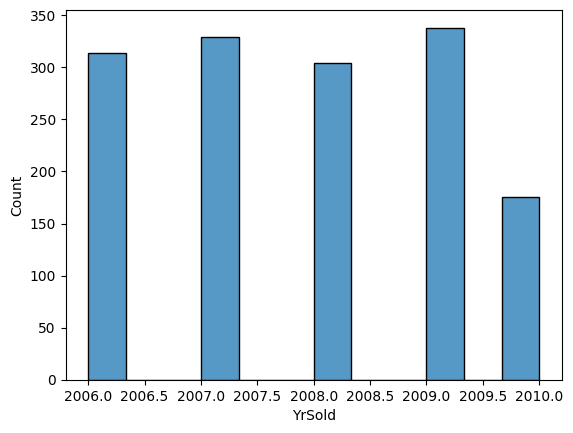

In [182]:
sns.histplot(data['YrSold'])

<Axes: xlabel='OverallQual', ylabel='Count'>

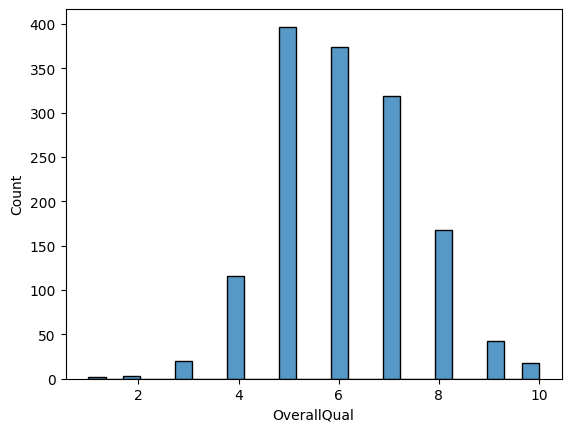

In [183]:
sns.histplot(x='OverallQual',data=data)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

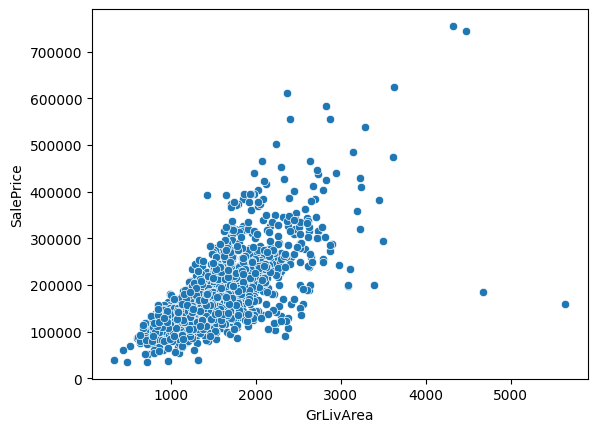

In [184]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=data)

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

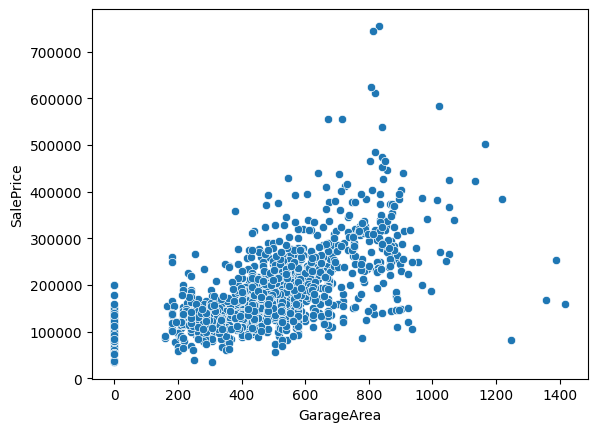

In [185]:
sns.scatterplot(x='GarageArea',y='SalePrice',data=data)

<Axes: xlabel='GarageCars', ylabel='Count'>

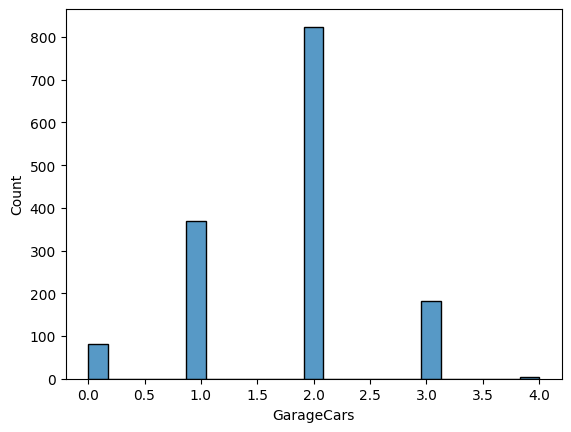

In [186]:
sns.histplot(x='GarageCars',data=data)

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

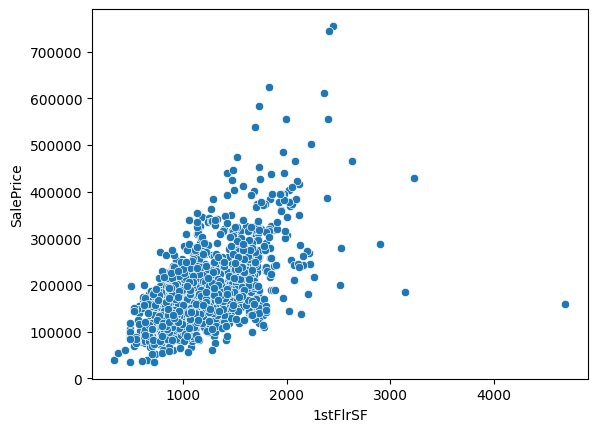

In [187]:
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=data)

<Axes: xlabel='TotalBsmtSF', ylabel='Count'>

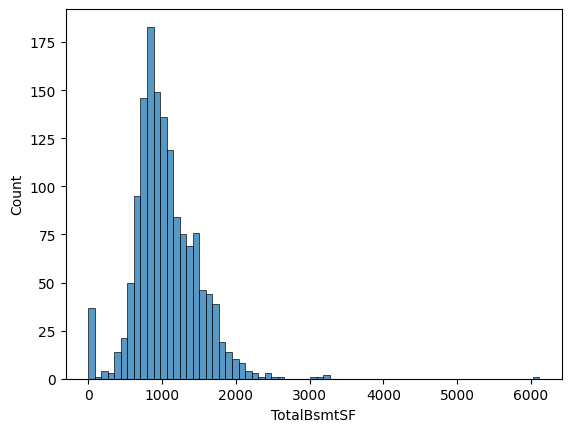

In [188]:
sns.histplot(x='TotalBsmtSF',data=data)

In [189]:
data=data.drop('Id',axis=1)
test_data=test_data.drop('Id',axis=1)

In [190]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [191]:
im=SimpleImputer(strategy='most_frequent')
x=im.fit_transform(data.drop('SalePrice',axis=1))
x_test=im.fit_transform(test_data)

In [192]:
x=pd.DataFrame(x,columns=test_data.columns)
test_data=pd.DataFrame(x_test,columns=test_data.columns)

In [193]:
x.isna().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


In [194]:
test_data.isna().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


In [195]:
en=LabelEncoder()
for i in test_data.select_dtypes(include='object'):
  x[i]=en.fit_transform(x[i])
  test_data[i]=en.fit_transform(test_data[i])

In [196]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   MSZoning       1460 non-null   int64
 2   LotFrontage    1460 non-null   int64
 3   LotArea        1460 non-null   int64
 4   Street         1460 non-null   int64
 5   Alley          1460 non-null   int64
 6   LotShape       1460 non-null   int64
 7   LandContour    1460 non-null   int64
 8   Utilities      1460 non-null   int64
 9   LotConfig      1460 non-null   int64
 10  LandSlope      1460 non-null   int64
 11  Neighborhood   1460 non-null   int64
 12  Condition1     1460 non-null   int64
 13  Condition2     1460 non-null   int64
 14  BldgType       1460 non-null   int64
 15  HouseStyle     1460 non-null   int64
 16  OverallQual    1460 non-null   int64
 17  OverallCond    1460 non-null   int64
 18  YearBuilt      1460 non-null   int64
 19  YearRe

In [197]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1459 non-null   int64
 1   MSZoning       1459 non-null   int64
 2   LotFrontage    1459 non-null   int64
 3   LotArea        1459 non-null   int64
 4   Street         1459 non-null   int64
 5   Alley          1459 non-null   int64
 6   LotShape       1459 non-null   int64
 7   LandContour    1459 non-null   int64
 8   Utilities      1459 non-null   int64
 9   LotConfig      1459 non-null   int64
 10  LandSlope      1459 non-null   int64
 11  Neighborhood   1459 non-null   int64
 12  Condition1     1459 non-null   int64
 13  Condition2     1459 non-null   int64
 14  BldgType       1459 non-null   int64
 15  HouseStyle     1459 non-null   int64
 16  OverallQual    1459 non-null   int64
 17  OverallCond    1459 non-null   int64
 18  YearBuilt      1459 non-null   int64
 19  YearRe

In [198]:
y=data['SalePrice']

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [201]:
x_train.shape

(1168, 79)

In [202]:
x_test.shape

(292, 79)

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [204]:
from sklearn.metrics import r2_score

In [205]:
def t(model):
  model.fit(x_train,y_train)
  preds=model.predict(x_test)
  return r2_score(y_test,preds)

In [206]:
models=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]
for i in models:
  print(t(i))

0.7091791869852865
0.8525288306182719
0.7827319309166728
-0.04744522233000459
0.6668783952467005


In [207]:
model=RandomForestRegressor()
model.fit(x,y)
preds=model.predict(test_data)

In [208]:
sub=pd.read_csv('/content/house-prices-advanced-regression-techniques/sample_submission.csv')

In [209]:
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [210]:
sub['SalePrice']=preds

In [211]:
sub.head()

,Id,SalePrice
0,1461,128198.58
1,1462,153922.84
2,1463,183924.70
3,1464,183318.82
4,1465,200932.06


In [212]:
sub.to_csv('submission.csv',index=False)